In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('clustering_data.csv')
x = dataset.iloc[:,1:14].values

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x_scaled=sc.transform(x)

In [5]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(x_scaled)
x_pca=pca.transform(x_scaled)

In [6]:
x_scaled.shape

(178, 13)

In [7]:
x_pca.shape

(178, 2)

In [8]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


C:\Users\Jackson ferrao\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


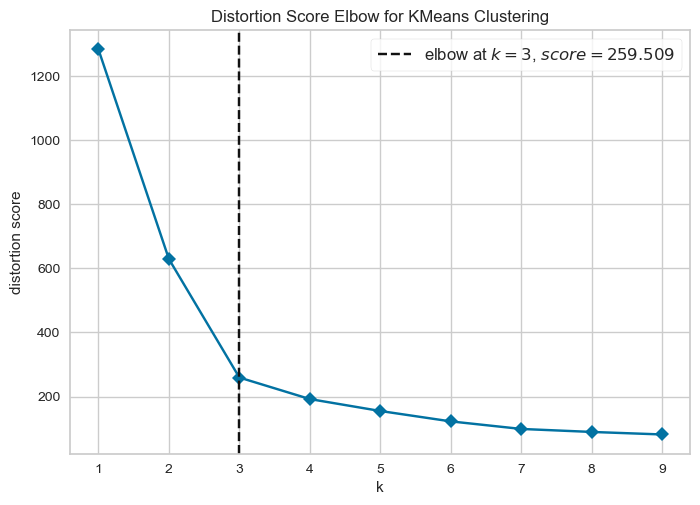

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(x_pca)
visualizer.show()

C:\Users\Jackson ferrao\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


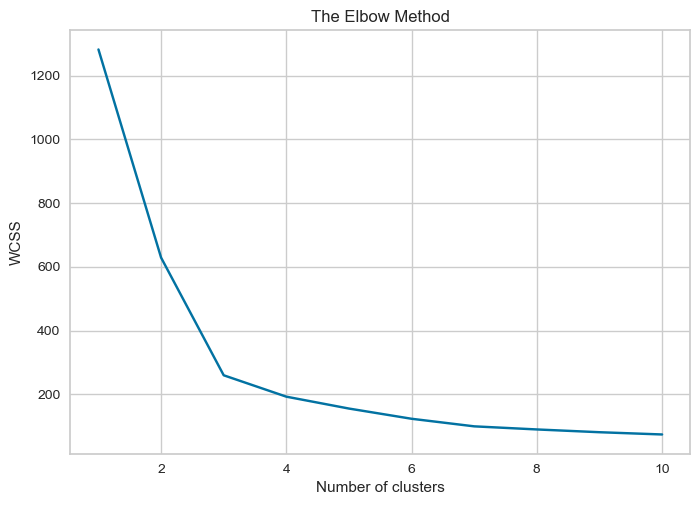

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
from sklearn.metrics import silhouette_score
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(x_pca)
    score = silhouette_score(x_pca, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i,score))

For cluster: 2, the silhouette score is: 0.46491409089201524
For cluster: 3, the silhouette score is: 0.5615238075263915
For cluster: 4, the silhouette score is: 0.49142133957103173
For cluster: 5, the silhouette score is: 0.4390950140335231
For cluster: 6, the silhouette score is: 0.43227510669772384
For cluster: 7, the silhouette score is: 0.42357060607218666
For cluster: 8, the silhouette score is: 0.40715090895931344
For cluster: 9, the silhouette score is: 0.39212351442293375


In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_pca)
score = silhouette_score(x_pca, kmeans.labels_)
print(score)

0.5610505693103247


In [15]:
print(y_kmeans)

[1 1 2 2 2 1 2 0 2 0 0 0 2 0 1 2 1 2 2 0 1 0 2 1 0 2 0 1 1 2 0 1 0 1 1 0 0
 0 2 0 0 2 1 0 1 2 0 0 0 1 1 0 2 0 0 1 2 0 0 0 2 0 1 1 1 1 0 1 2 0 1 1 2 1
 0 1 2 2 0 2 2 2 2 2 0 2 0 0 0 1 0 0 1 2 0 1 0 0 1 1 0 1 1 2 0 1 2 0 1 1 0
 1 2 1 2 0 0 2 1 0 0 1 0 2 2 2 1 1 0 0 1 1 2 2 0 1 0 1 1 2 1 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 1 0 2 2 2 2 0 2 0 1 0 1 1 2 0 1 0 0 1 1 2 2 2]


In [16]:
pd.DataFrame(y_kmeans).to_csv("Iterators-group5-exercise2.csv")

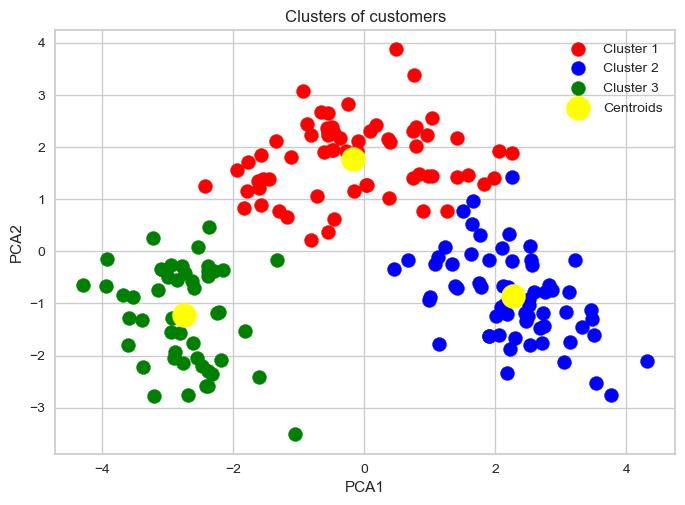

In [17]:
plt.scatter(x_pca[y_kmeans == 0, 0], x_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_pca[y_kmeans == 1, 0], x_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_pca[y_kmeans == 2, 0], x_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()